<a href="https://colab.research.google.com/github/michaelcerda/Kaggle-Projects/blob/main/A_Guide_to_Advanced_Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

### Read the Train Data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Ames Housing/train.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print('The shape of the train dataset is {}'.format(train.shape))

The shape of the train dataset is (1460, 81)


In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
train.isnull().sum()/len(train)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [ ]:
###Drop the 'Id' column

train_Id = train['Id']
print('The original shape of the train dataset is {}'.format(train.shape))
train.drop('Id', axis = 1, inplace = True)
print('The new shape of the train dataset is {}'.format(train.shape))

The original shape of the train dataset is (1460, 81)
The new shape of the train dataset is (1460, 80)


### Exploratory Data Analysis

In [ ]:
#Determine the number of missing values
train_na = train.isnull().sum()/len(train) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

We can see that PoolQC, MiscFeature and Alley have more than 90% missing values. The natural tendency is to drop these columns. However, if we study the data_description.txt file, the label 'NA' for these features mean the absence of a pool, miscellaneous feature and an alley. Hence, we will not drop these columns but instead, we'll replace those with 'None' in the data cleaning section

The author of the dataset, Dean De Cock of Truman State University, mentioned that there are outliers in the dataset particularly when we plot GrLivArea vs SalePrice

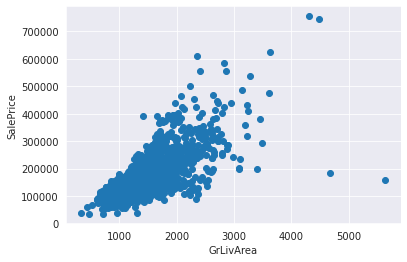

In [ ]:
#Let's explore the outliers

sns.set_style('darkgrid')
fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

The author recommends removing houses with more than 4000 square feet so let's do that

In [ ]:
train = train.drop(train[train['GrLivArea'] > 4000].index)

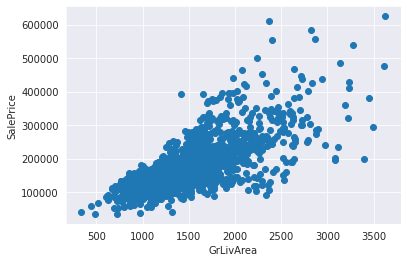

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

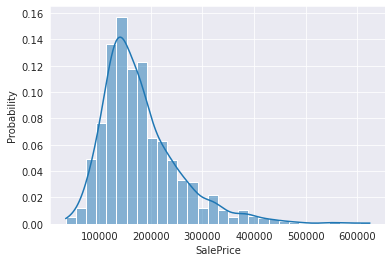

In [ ]:
#Let's explore the target variable 'SalePrice'

sns.histplot(train['SalePrice'], stat = 'probability', bins = 30, kde = True)
plt.show()

We can see that the data is skewed to the right, meaning that the tail is on the right side. To create a good model, at least for regression, we'd like our data to follow a normal distribution

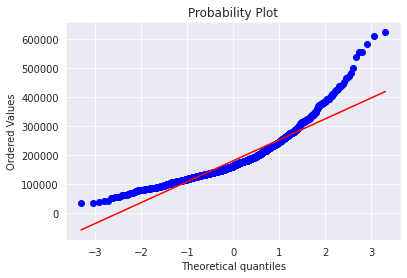

In [ ]:
prob = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

The QQ (Quantile-Quantile) plot above confirms that we don't have a normal distribution

### Log Transformation of the Target Variable

To address the skewness of the target variable, we'll perform a log transformation

In [ ]:
#We'll use the numpy log1p function for the log transformation of the target variable

train['SalePrice'] = np.log1p(train['SalePrice'])

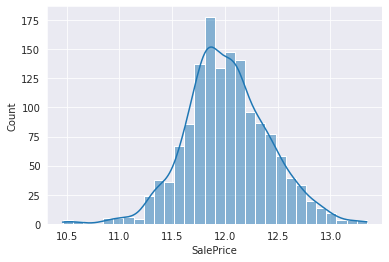

In [ ]:
sns.histplot(train['SalePrice'], bins = 30, kde = True)
plt.show()

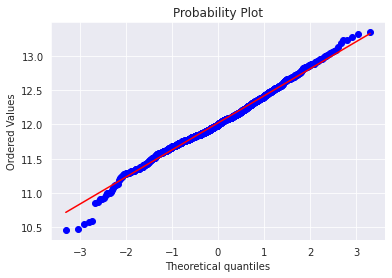

In [ ]:
prob = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

### Data Cleaning

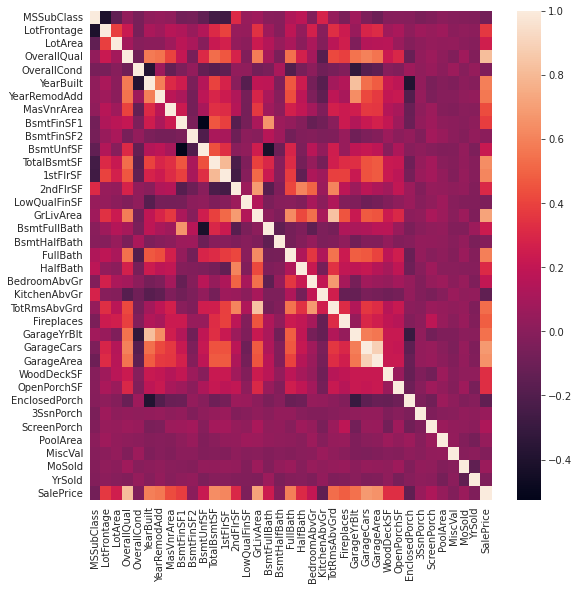

In [ ]:
plt.figure(figsize = (9,9))
sns.heatmap(train.corr())
plt.show()

In [ ]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.819240
GrLivArea        0.718844
GarageCars       0.680408
GarageArea       0.655212
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363286
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
MoSold           0.062231
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
YrSold          -0.034319
OverallCond     -0.036843
LowQualFinSF    -0.037698
MSSubClass      -0.075083
KitchenAbvGr    -0.147891
EnclosedPorch   -0.148636
Name: SalePrice, dtype: float64

We can see that OverallQual and GrLivArea have strong correlations with SalePrice

Now it's time to fill the missing values. As I've stated earlier, for some features, NA means None so we'll fill those features with None

In [ ]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
  train[col] = train[col].fillna('None')

In [ ]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [ ]:
train_na = train.isnull().sum()/len(train)
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na

GarageCond      0.055632
GarageQual      0.055632
GarageFinish    0.055632
GarageYrBlt     0.055632
GarageType      0.055632
BsmtFinType2    0.026099
BsmtExposure    0.026099
BsmtFinType1    0.025412
BsmtCond        0.025412
BsmtQual        0.025412
MasVnrArea      0.005495
MasVnrType      0.005495
Electrical      0.000687
dtype: float64

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
  train[col] = train[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
  train[col] = train[col].fillna(0)

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  train[col] = train[col].fillna(0)

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  train[col] = train[col].fillna('None')

In [ ]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [ ]:
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [ ]:
train = train.drop(['Utilities'], axis = 1)

In [ ]:
train['Functional'] = train['Functional'].fillna('Typ')

In [ ]:
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
  train[col] = train[col].fillna(train[col].mode()[0])

In [ ]:
train['MSSubClass'] = train['MSSubClass'].fillna('None')

In [ ]:
#Check for remaining missing values
train_na = train.isnull().sum()/len(train)
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
print('There are {} missing values'.format(len(train_na)))

There are 0 missing values


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
  le = LabelEncoder()
  le.fit(list(train[c].values))
  train[c] = le.transform(list(train[c].values))

print('The shape of train: {}'.format(train.shape))

The shape of train: (1456, 79)


In [ ]:
###Assign 'SalePrice' to target
target = train['SalePrice']

###Drop the 'SalePrice' from data
train.drop(['SalePrice'], axis = 1, inplace = True)
print('Shape of train dataset: {}'.format(train.shape))

Shape of train dataset: (1456, 78)


### Feature Engineering

In [ ]:
import numpy as np

for f in ('OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'):
  train[f+'_p2'] = train[f] **2
  train[f+'_p3'] = train[f] **3
  train[f+'_psqrt'] = np.sqrt(train[f])

#Adding total sqfootage feature
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
# train['OverArea'] = train['OverallQual'] * train['GrLivArea']
# train['OverArea'] = train['GarageCars'] * train['GarageArea']

In [ ]:
num_feats = train.dtypes[train.dtypes != 'object'].index

skew_feats = train[num_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_feats})
skewness.head(10)

,Skew
MiscVal,24.418175
PoolArea,17.504556
LotArea,12.574590
3SsnPorch,10.279262
LowQualFinSF,8.989291
LandSlope,4.801326
KitchenAbvGr,4.476748
BsmtFinSF2,4.244209
BsmtHalfBath,4.124712
ScreenPorch,4.111400


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

There are 71 skewed numerical features to Box Cox transform


In [ ]:
from scipy.special import boxcox1p
skew_feats = skewness.index
lam = 0.15
for s in skew_feats:
  train[s] = boxcox1p(train[s],lam)

### Read the Test Data

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Ames Housing/test.csv')

In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_na = test.isnull().sum()/len(test) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)
test_na

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

In [ ]:
#Similar to the train dataset, let's save the Id column to test_Id and then drop it from the test dataset
test_Id = test['Id']
test.drop('Id',axis=1,inplace=True)

Now it's time to fill the missing values. As I've stated earlier, for some features, NA means None so we'll fill those features with None

In [ ]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'):
  test[col] = test[col].fillna('None')

In [ ]:
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [ ]:
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
  test[col] = test[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
  test[col] = test[col].fillna(0)

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  test[col] = test[col].fillna(0)

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  test[col] = test[col].fillna('None')

In [ ]:
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [ ]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [ ]:
test = test.drop(['Utilities'], axis =1)

In [ ]:
test['Functional'] = test['Functional'].fillna('Typ')
test['MSSubClass'] = test['MSSubClass'].fillna('None')

In [ ]:
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
  test[col] = test[col].fillna(test[col].mode()[0])

In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
  le.fit(list(test[c].values))
  test[c] = le.transform(list(test[c].values))


### Test dataset - Feature Engineering

In [ ]:
for f in ('OverallQual', 'GrLivArea','GarageCars', 'GarageArea'):
  test[f+'_p2'] = test[f] **2
  test[f+'_p3'] = test[f] **3
  test[f+'_psqrt'] = np.sqrt(test[f])

#Adding total sqfootage feature
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
# test['OverArea'] = test['OverallQual'] * test['GrLivArea']
# test['OverArea'] = test['GarageCars'] * test['GarageArea']

In [ ]:
numeric_feats = test.dtypes[test.dtypes != 'object'].index

skewed_feats = test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)

,Skew
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
GrLivArea_p3,8.722995
LandSlope,4.963280
EnclosedPorch,4.664371
GarageArea_p3,4.382002
KitchenAbvGr,4.074860
BsmtFinSF2,4.038796


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
  test[feat] = boxcox1p(test[feat], lam)

There are 71 skewed numerical features to Box Cox transform


In [ ]:
print('Test data shape:{}'.format(test.shape))

Test data shape:(1459, 91)


In [ ]:
print('Train data shape: {}'.format(train.shape))

Train data shape: (1456, 91)


In [ ]:
#Save the number of rows for each dataset
len_train = train.shape[0]
len_test = test.shape[0]

In [ ]:
#Let's combine the train and test datasets prior to OHE
data = pd.concat((train,test)).reset_index(drop=True)

In [ ]:
#OHE
data = pd.get_dummies(data)
print(data.shape)

(2915, 232)


In [ ]:
#Let's split 'data' back to train and test
train = data[:len_train]
test = data[len_train:]

print('Train dataset shape: {}'.format(train.shape))
print('Test dataset shape: {}'.format(test.shape))

Train dataset shape: (1456, 232)
Test dataset shape: (1459, 232)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

### Training a Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
          keras.layers.Dense(30, activation="relu",
          input_shape=train.shape[1:]), keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=1000, 
                    validation_data=(X_test,y_test), 
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/1000
37/37 [==============================] - 1s 8ms/step - loss: 6.5142 - val_loss: 2.7448
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.9656 - val_loss: 1.7091
Epoch 3/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.2875 - val_loss: 1.1215
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.8801 - val_loss: 0.7424
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5144
Epoch 6/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.3863 - val_loss: 0.3795
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2796 - val_loss: 0.3115
Epoch 8/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2224 - val_loss: 0.2216
Epoch 9/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.1803 - val_loss: 0.1935
Epoch 10/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.1478 - val_loss: 0.1644

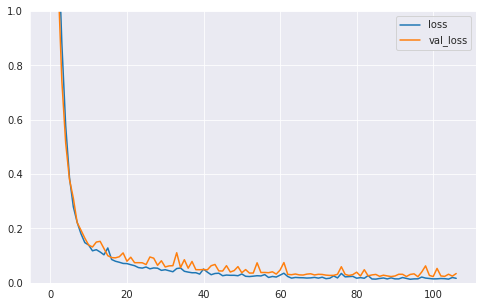

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
mse_test

0.02238290198147297

In [ ]:
preds = np.expm1(model.predict(test))

In [ ]:
preds = preds.ravel()

In [ ]:
output = pd.DataFrame({'Id':test_Id,'SalePrice':preds})
output.to_csv('submission.csv',index=False)